In [6]:
# Load diabetics.csv

import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
# Cluster the data using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df)

# Plot the clusters using go library
import plotly.express as px
fig = px.scatter(df, x='Glucose', y='Insulin', color=clusters.astype(str),
                    title='2D Scatter plot of Diabetic Data with KMeans Clusters')
fig.show()

In [25]:
# Plot scatter plot of Age vs Insulin using plotly

fig = px.scatter(df, x='Age', y='Insulin', color='Outcome',
                    title='Age vs Insulin colored by Outcome')
fig.show()

In [48]:
# Create decision tree model to predict Outcome and evaluate accuracy

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Model Accuracy: {accuracy:.2f}')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Decision Tree Model Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

[[83 16]
 [21 34]]


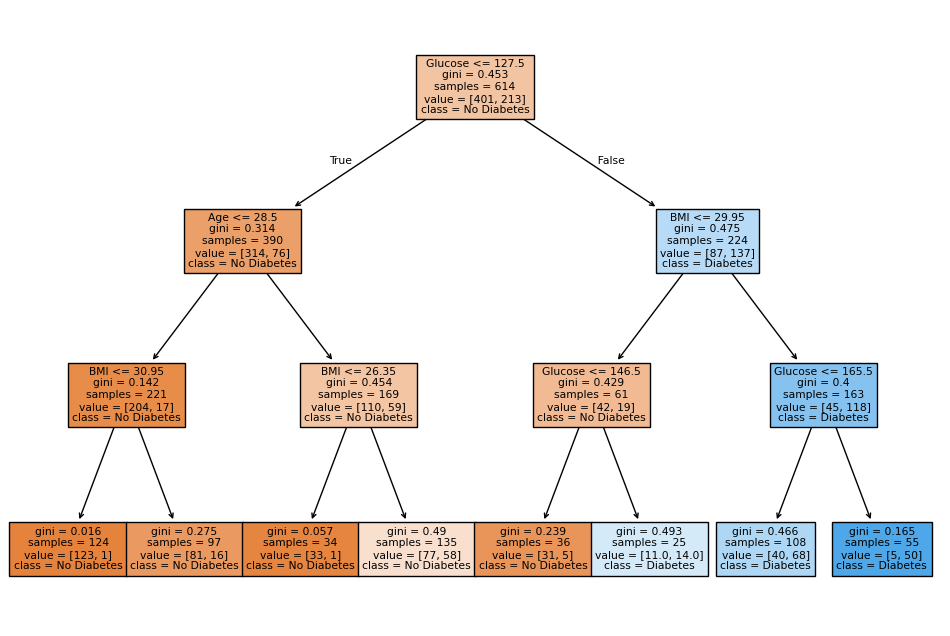

In [49]:
# Plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()

In [47]:
# Random forest model to predict Outcome and evaluate accuracy
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=0)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f'Random Forest Model Accuracy: {rf_accuracy:.2f}')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rf_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_rf_pred))


Random Forest Model Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        99
           1       0.66      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

[[82 17]
 [22 33]]


In [41]:
# Logistic regression model to predict Outcome and evaluate accuracy

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_log_pred)
print(f'Logistic Regression Model Accuracy: {log_accuracy:.2f}')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_log_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_log_pred))


Logistic Regression Model Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

[[78 21]
 [18 37]]


In [43]:
# Plot logistic regression countour plot using plotly
import plotly.graph_objects as go
import numpy as np
x_min, x_max = X['Glucose'].min() - 10, X['Glucose'].max() + 10
y_min, y_max = X['Insulin'].min() - 10, X['Insulin'].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))
Z = log_model.predict(np.c_[xx.ravel(), yy.ravel(),
                          np.full(xx.ravel().shape, X['Pregnancies'].mean()),
                          np.full(xx.ravel().shape, X['BloodPressure'].mean()),
                          np.full(xx.ravel().shape, X['SkinThickness'].mean()),
                          np.full(xx.ravel().shape, X['BMI'].mean()),
                          np.full(xx.ravel().shape, X['DiabetesPedigreeFunction'].mean()),
                          np.full(xx.ravel().shape, X['Age'].mean())])
Z = Z.reshape(xx.shape)
fig = go.Figure(data=go.Contour(
    z=Z,
    x=np.arange(x_min, x_max, 1),
    y=np.arange(y_min, y_max, 1),
    colorscale='RdBu',
    opacity=0.5,
    contours=dict(showlines=False)
))
fig.add_trace(go.Scatter(
    x=X['Glucose'],
    y=X['Insulin'],
    mode='markers',
    marker=dict(
        color=y,
        colorscale='RdBu',
        line=dict(color='black', width=1)
    ),
    name='Data Points'
))
fig.update_layout(
    title='Logistic Regression Decision Boundary',
    xaxis_title='Glucose',
    yaxis_title='Insulin'
)
fig.show()

c:\Users\ashmi\scoop\apps\python\3.13.5\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

